# **Rodrigo_Mesquita_DR1_AT**
### **Inteligência Artificial: Model LifeCycle [24E1_1]**

Link do Notebook: https://colab.research.google.com/drive/1a7zt3DNzroI03KE071AizfZSZqTeTOc_?usp=sharing

##1. O que você entende por Machine Learning? Apresente um exemplo de um problema onde pode ser aplicada.

É uma área da computação de utiliza algoritmos e modelos matemáticos que permitem aos computadores aprenderem com os dados e identificar padrões complexos, sem serem explicitamente programados para isso.
ML permite automatizar tarefas complexas, melhorar processos e tomar mellhores decisões baseadas em dados. Por exemplo, auxiliando em diagnósticos médicos, identificando padrões em exames de imagem, recomendado filmes e produtos ou identificando fraudes.

##2. Explique com suas palavras o que caracteriza um problema como supervisionado em Machine Learning.

Neste tipo de problema há um conjunto de dados rotulados, ou seja, informações históricas fornecidas ao modelo para que ele consiga aprender, e assim possa replicar o mesmo comportamento para novos dados, realizando predições.


##3. Diferencie aprendizado baseado em instâncias de aprendizado baseado em modelos.

No aprendizado baseado em instâncias, o modelo faz previsões com base na similaridade entre novos dados e os dados de treinamento, sem criar um modelo geral abstraindo os dados originais, como no caso do KNN. Já no aprendizado baseado em modelos, um modelo é criado a partir dos dados de treinamento para fazer previsões sobre novos dados, como na regressão linear, onde o modelo busca representar os padrões nos dados para realizar previsões.

##4. Apresente um desafio relacionado à aplicação de machine learning em problemas de negócio reais.

Conseguir realizar a seleção de Features, identificar quais as melhores existentes no conjunto de dados para que sejam passadas no treinamento do modelo. Para isto é necessário conhecer sobre o negócio para identificar a relevância de cada informação, analisar a qualidade dos dados que estão presentes em cada features, conseguir encontrar o equilíbrio entre selecionar mais features que o necessário, aumentando desnecessariamente a complexidade do modelo, ou menos que o necessário, prejudicando a capacidade de aprendizagem.

##5. Carregue o dataset chamado "AT_Customer_Churn" fornecido com o AT para um dataframe utilizando linguagem Python e execute as transformações pedidas, com a biblioteca Pandas.

In [ ]:
#!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns


In [9]:
df_churn = pd.read_csv('/content/drive/MyDrive/Faculdade/Colab Notebooks/Datasets/AT_Customer_Churn.csv')

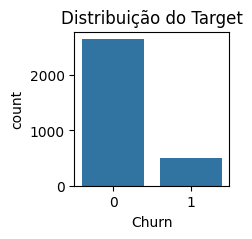

In [10]:
plt.figure(figsize=(2,2))
plt.title('Distribuição do Target')
sns.countplot(df_churn, x='Churn')
plt.show()

In [11]:
print(df_churn['Churn'].value_counts())

Churn
0    2655
1     495
Name: count, dtype: int64


In [ ]:
df_churn.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Hours of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Age,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,1.242350,69.460635,73.174921,23.509841,2.826032,1.077778,30.998413,0.157143
std,7.263886,0.265851,8.573482,1.521072,1.166086,57.413308,112.237560,17.217337,0.892555,0.267864,8.831095,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,15.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,0.386458,27.000000,6.000000,10.000000,2.000000,1.000000,25.000000,0.000000
50%,6.000000,0.000000,35.000000,0.000000,0.830556,54.000000,21.000000,21.000000,3.000000,1.000000,30.000000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,1.799514,95.000000,87.000000,34.000000,3.000000,1.000000,30.000000,0.000000
max,36.000000,1.000000,47.000000,10.000000,4.747222,255.000000,522.000000,97.000000,5.000000,2.000000,55.000000,1.000000


### Elimine as variáveis "Customer Value" e "Status".

In [12]:
df_churn = df_churn.drop(['Customer Value', 'Status'], axis=1)

###Transforme a variável "Seconds of Use", convertendo-a de segundos para horas.

In [13]:
df_churn['Seconds of Use'] = df_churn['Seconds of Use'] / 3600


###Renomeie a variável de forma apropriada para "Hours of Use".

In [14]:
df_churn.rename(columns={'Seconds of Use': 'Hours of Use'}, inplace=True)

##6. Separe o dataframe resultante das intervenções da questão 05 em Treino-Teste, utilizando a proporção 70-30%.

In [16]:
x = df_churn.drop(['Churn'], axis=1)
y = df_churn['Churn']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=12)

##7. Considerando que iremos aplicar um modelo KNN, identifique o melhor K a ser utilizado no problema. Justifique sua resposta.

Eu escolheria K=15, pois os é o ponto onde os resultados de treino e teste se aproximaram e começam a mostrar uma consistância, sem grandes variações. A acurácia do K=15 me parece um ótimo valor, apresentando 94% tanto para treino quanto para teste.

In [18]:
valor_k = list(range(3,50,2))
train_yhat = []
train_acc = []
train_scores = []
test_yhat = []
test_acc = []
test_scores = []

for k in valor_k:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(x_train, y_train.values.ravel())

    #Avaliar score com dados de treino
    train_yhat = knn.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    #Avaliar score com dados de teste
    test_yhat = knn.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    print('>%d, ACC treino: %.3f, ACC teste: %.3f' %(k, train_acc, test_acc))

>3, ACC treino: 0.967, ACC teste: 0.948
>5, ACC treino: 0.962, ACC teste: 0.944
>7, ACC treino: 0.959, ACC teste: 0.945
>9, ACC treino: 0.956, ACC teste: 0.940
>11, ACC treino: 0.952, ACC teste: 0.944
>13, ACC treino: 0.951, ACC teste: 0.942
>15, ACC treino: 0.946, ACC teste: 0.942
>17, ACC treino: 0.946, ACC teste: 0.942
>19, ACC treino: 0.947, ACC teste: 0.942
>21, ACC treino: 0.942, ACC teste: 0.939
>23, ACC treino: 0.938, ACC teste: 0.941
>25, ACC treino: 0.936, ACC teste: 0.941
>27, ACC treino: 0.936, ACC teste: 0.939
>29, ACC treino: 0.933, ACC teste: 0.937
>31, ACC treino: 0.932, ACC teste: 0.935
>33, ACC treino: 0.931, ACC teste: 0.929
>35, ACC treino: 0.928, ACC teste: 0.926
>37, ACC treino: 0.927, ACC teste: 0.923
>39, ACC treino: 0.925, ACC teste: 0.923
>41, ACC treino: 0.924, ACC teste: 0.920
>43, ACC treino: 0.922, ACC teste: 0.920
>45, ACC treino: 0.922, ACC teste: 0.919
>47, ACC treino: 0.922, ACC teste: 0.913
>49, ACC treino: 0.919, ACC teste: 0.915


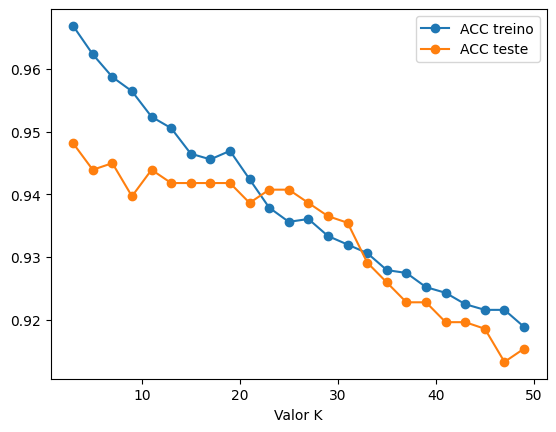

In [19]:
plt.plot(valor_k, train_scores, '-o', label='ACC treino')
plt.plot(valor_k, test_scores, '-o', label='ACC teste')
plt.xlabel('Valor K')
plt.legend()

##8. Execute o modelo KNN com o melhor valor de K encontrado e apresente sua acurácia.

In [20]:
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(x_train, y_train.values.ravel())
y_pred = knn.predict(x_test)
score = np.mean(y_test.values.ravel() != y_pred)
acuracia = metrics.accuracy_score(y_test.values.ravel(),y_pred)

print("score:",score)
print("acuracia:",acuracia)

score: 0.0582010582010582
acuracia: 0.9417989417989417


##9. Explique, com suas palavras, como utilizar a técnica conhecida como "curvas de aprendizado" para avaliar se um modelo está sofrendo ou não do problema conhecido como Overfitting.

A Curva de Aprendizado apresenta uma comparação de performance do modelo entre os dados de treino e teste. Para formar a curva são executadas diversas iterações de treino do modelo, utilizando a cada iteração um valor diferente para o parâmetro que se pretende analisar, de forma progressiva. Ao se plotar em gráfico é possível encontrar o ponto ideal em que os scores de treino e teste alcançam a maior proximidade, antes do modelo começar a se adequar demais aos dados de treino, crescendo seu score em um ritmo mais acelerado que o score em teste, se distanciando e criando uma "boca de jacaré".

##10. Utilizando a mesma base anterior, já preparada, aplique um modelo KNN com o mesmo parâmetro K definido anteriormente, porém agora com uma abordagem de validação cruzada, com 5 dobras.

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [31]:
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
kf = KFold(n_splits=5)
scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=kf, scoring = 'accuracy')

knn.fit(x_train, y_train.values.ravel())
y_pred = knn.predict(x_test)

##11. Apresente a acurácia do seu modelo.

In [32]:
acuracia_media = scores.mean()
acuracia_teste = accuracy_score(y_test, y_pred)

print("Acurácia Média (Cross-Validation):", acuracia_media)
print("Acurácia nos Dados de Teste:", acuracia_teste)

Acurácia Média (Cross-Validation): 0.9306122448979591
Acurácia nos Dados de Teste: 0.9417989417989417


##12. Explique, com suas palavras, qual a influência do parâmetro K no Overfitting, em modelos KNN.

O parâmetro K determina a quantidade de vizinhos mais próximos que serão analisados pelo modelo para se determinar a classificação de um ponto, ou a regressão. Um baixo valor de K tenderá a criar Overfitting, pois a análise ficará mais sensível aos vizinhos imediatamente ao lado do ponto analisado. Por outro lado, um valor de K maior tende a generalizar o modelo, podendo causar Underffiting

##13. Explique, com suas palavras, a importância da abordagem Treino-Teste para a prevenção do problema conhecido como Overfitting.

A separação em dois conjuntos de dados permite comparar as métricas de desempenho. Assim é possível identificar se o modelo conseguiu manter um nível adequado de generalização ao aprender os padrões do conjunto de treino, de forma que consiga replicar o padrão aprendido ao prever o target do conjunto de testes.

##14. Crie uma curva ROC para o modelo criado e apresente a métrica associada à curva.

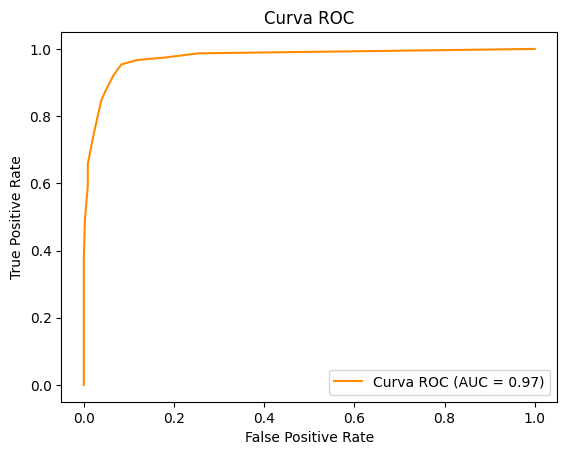

In [33]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        name="Curva ROC",
        color="darkorange",
    )
display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Curva ROC",
)
plt.show()

##15. Crie uma curva Precision-Recall para o modelo criado e apresente a métrica associada à curva.

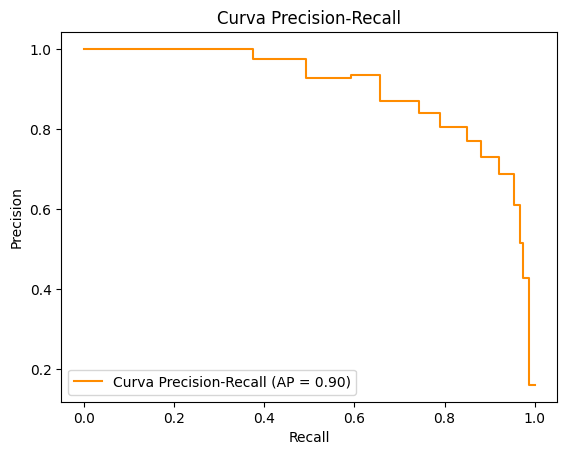

In [34]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
        knn,
        x_test,
        y_test,
        name="Curva Precision-Recall",
        color="darkorange",
    )
display.ax_.set(
    xlabel="Recall",
    ylabel="Precision",
    title="Curva Precision-Recall",
)

plt.show()

##16. Apresente a matriz de confusão e as métricas Acurácia, Precision e Recall para seu modelo.

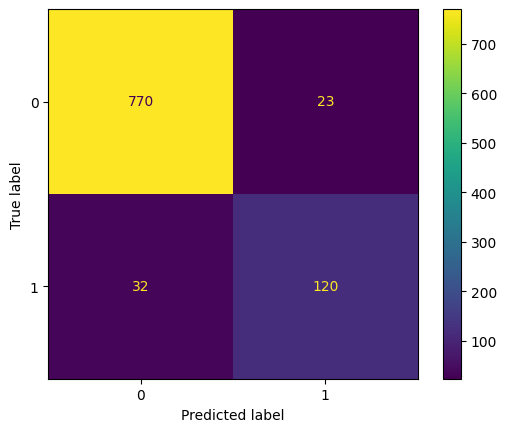

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score

acuracia_media = scores.mean()
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia Média:", acuracia_media)
print("Precision:", precision)
print("Recall:", recall)

Acurácia Média: 0.9306122448979591
Precision: 0.8391608391608392
Recall: 0.7894736842105263


##17. Baseado no que foi discutido em sala ao falarmos das vantagens e desvantagens do modelo KNN, você acha que este é um modelo apropriado para o cenário de dados apresentado? Justifique sua resposta.

O modelo KNN pode não ser o melhor para um problema de previsão de Churn devido ao desbalanceamento natural deste tipo de base, onde é esperado que a quantidade de clientes que realizaram distrato seja muito inferior à quantidade de clientes que permanecem. O KNN não é um bom modelo para bases desbalanceadas, pois a classe majoritária pode dominar as previsões devido à sua proximidade com mais vizinhos. Além disto, há apenas 495 amostras da classe minoritária, o que seria pouco para um aprendizado adequado dos clientes que realizam churn.

Devido a este desbalanceamento, dos 152 casos reais de Churn no conjunto de teste, 32(21%) não foram preditos como churn. Além disto outras 23 amostras foram preditas indevidemante como churn.